In [1]:
import pandas as pd
import dhlab as dh

In [2]:
barn = pd.read_csv("j_books 1.csv", index_col = 0)

In [9]:
barn.

,urn,008
0,URN:NBN:no-nb_digibok_2014112107526,150724s2010 no ||||j |||||000|0|nob|
1,URN:NBN:no-nb_digibok_2011102708058,150909s1950 xx ||||j |||||000|u|nob|
2,URN:NBN:no-nb_digibok_2006120500039,150206s1922 no#||||j |||||000|u|nob|d
3,URN:NBN:no-nb_digibok_2009042304086,150520s1993 no#||||j |||||000|0bnob|
4,URN:NBN:no-nb_digibok_2011022305105,120625s1999 no#||a|j |||||||||||mul|
...,...,...
56988,URN:NBN:no-nb_digibok_2022092948039,150908s2015 no a j |||||000|j nob|
56989,URN:NBN:no-nb_digibok_2022092948042,150702s2015 no a|||j||||||000|j|nob|
56990,URN:NBN:no-nb_digibok_2022100648053,141204s1985 dk |||j |||||000|f dan|
56991,URN:NBN:no-nb_digibok_2022100748014,170207s2016 no j |||||00||f nob|


In [4]:
corp = dh.Corpus()

In [10]:
corp.extend_from_identifiers(list(barn.dropna().urn))

In [11]:
corpus = corp.frame

In [13]:
corpus.dhlabid = corpus.dhlabid.astype(int)
corpus.year = corpus.year.astype(int)

In [20]:
agg = corpus.groupby("year").size()

<Axes: xlabel='year'>

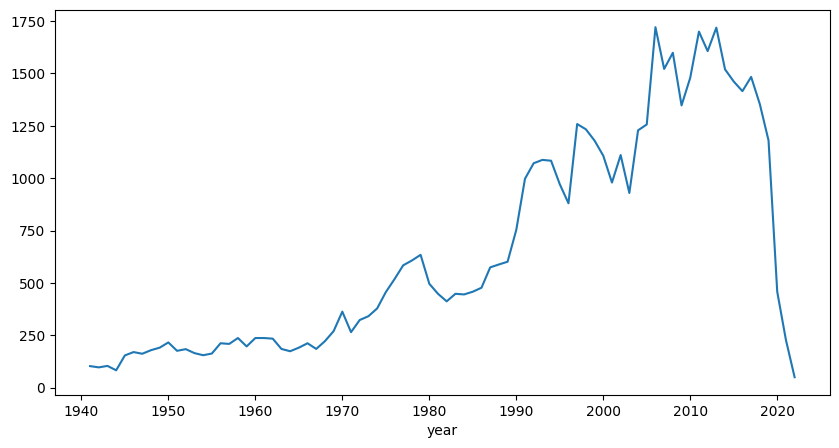

In [26]:
agg[agg.index > 1940].plot(kind="line", figsize=(10,5))

In [29]:
splits = [1945, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
groups = [splits[a:a+2] for a in range(len(splits)-1)]

In [30]:
groups

[[1945, 1950],
 [1950, 1960],
 [1960, 1970],
 [1970, 1980],
 [1980, 1990],
 [1990, 2000],
 [2000, 2010],
 [2010, 2020],
 [2020, 2030]]

In [31]:
barn = corpus

In [58]:
barn = barn.loc[barn.literaryform == 'Skjønnlitteratur']

#.loc[~barn.subjects.str.contains('grunnskolen|undervisning|ungdomstrinnet|lærebok|lærebøker|klasse|barneskolen|pedagogikk|oppdragelse')]
len(barn)

26915

In [62]:
barn.to_csv("barn.csv")

In [59]:
barn

,urn,dhlabid,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype,ocr_creator,ocr_timestamp
0,URN:NBN:no-nb_digibok_2006080900015,100507987,Mellem slagene,"Bjørnson , Bjørnstjerne",oai:nb.bibsys.no:999106250504702202,e3e1c742e067738f81bf79e460a04c91,,Oslo,19570101.0,1957,Gyldendal,nob,,839.92,fiction,Skjønnlitteratur,digibok,nb,20060101
8,URN:NBN:no-nb_digibok_2006081400002,100508105,Skatten på Sjørøverøya,"Stevenson , Robert Louis / Hauge , Eivind / Ab...",oai:nb.bibsys.no:999304229374702202,d62b2cf13cafef0d4f826373bdaf3460,8251778840,Oslo,19510101.0,1951,Damm,nob / eng,ungdomslitteratur,,novel,Skjønnlitteratur,digibok,nb,20060101
11,URN:NBN:no-nb_digibok_2006081500014,100508133,Eventyr og dyresoger : frå mange land,"Løland , Rasmus / Jørgensen , Øystein / Løwe ,...",oai:nb.bibsys.no:999609846664702202,2a668455b1095f20b5caf0514a0ae074,,Oslo,19690101.0,1969,Samlaget,nno,Dyr / eventyr / dyr / sagn,398.2,short story,Skjønnlitteratur,digibok,nb,20060101
16,URN:NBN:no-nb_digibok_2006081600007,100508180,Svend Bidevind,"Lie , Bernt",oai:nb.bibsys.no:999619870144702202,ef9fd7b04b42f96e349789314ae183aa,,[Oslo],19710101.0,1971,Ansgar,nob,,839.93,fiction,Skjønnlitteratur,digibok,nb,20060101
26,URN:NBN:no-nb_digibok_2006081800039,100614075,Tysk læsebog for middelskolens høiere klasser,"Gundersen , B. ( Bertrand )",oai:nb.bibsys.no:999723157804702202,d16cdd0dfe89e545e62710598c2e4db7,,Kristiania,18900101.0,1890,Cammermeyer,ger / nob,,,fiction,Skjønnlitteratur,digibok,dhlab,20221201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56641,URN:NBN:no-nb_pliktmonografi_000000314,100641425,Prinsesse prinsesse alle sine dager,"O'Neill, Katie / Holgernes, Ole Johan",oai:nb.bibsys.no:999920138398702202,37f4528cd073da9af4dd6c31716cfeb0,,Oslo,2021.0,2021,Outland forlag,nob / eng,Prinsesser / Prinsesser / Kjærlighet / Kjærlei...,741.5993,fiction / tekst / stillbilde,Skjønnlitteratur,digibok,,
56642,URN:NBN:no-nb_pliktmonografi_000001488,100640914,Niillas ja Mággá,"Wollmann, Terje T. (Terje Tovik) / Wollmann, T...",oai:nb.bibsys.no:999920073103202202,979970e4a2ff6363f15b5e75b0f9a169,,,2020.0,2020,Vintereik forlag,sme / nob,søsken / reindrift,741.59481,fiction / stillbilde / tekst,Skjønnlitteratur,digibok,,
56647,URN:NBN:no-nb_pliktmonografi_000006913,100646100,Lisa og havørnungen,"Pedersen, Erling / Pedersen, Erling",oai:nb.bibsys.no:999920160596902202,351de292029441495358a0b2fbbc168e,,[Larvik],2021.0,2021,Fresje,nob,,839.82374,short story / tekst,Skjønnlitteratur,digibok,,
56648,URN:NBN:no-nb_pliktmonografi_000008721,100647522,Drømmeverden,"Sleipnes, Roselind Strømdahl / Sleipnes, Rosel...",oai:nb.bibsys.no:999920306902202202,9af5c27d71fc70d25c8c3cd121402810,,[Tjongsfjorden],2022.0,2022,Roselind Strømdahl Sleipnes,nob,,839.8238,fiction / tekst,Skjønnlitteratur,digibok,,


In [60]:
barn_år = {f"{str(x[0])}-{str(x[1])}": barn.loc[barn.year >= x[0]].loc[barn.year < x[1]] for x in groups}

In [65]:
import dhlab_api as api

In [71]:
barn.dhlabid

0        100507987
8        100508105
11       100508133
16       100508180
26       100614075
           ...    
56641    100641425
56642    100640914
56647    100646100
56648    100647522
56649    100647771
Name: dhlabid, Length: 26915, dtype: int64

In [68]:
list(barn.set_index('dhlabid').index)[:10]

[100507987,
 100508105,
 100508133,
 100508180,
 100614075,
 100508064,
 100508346,
 100508419,
 100001386,
 100001486]

In [73]:
dh.utils.display.

AttributeError: module 'dhlab.utils' has no attribute 'urnlist'

In [74]:
dh.Concordance(barn.dhlabid, "elever")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)